## Evaluation of geometric modelling for 

1. TECDEM: data\evaluation\TECDEM
2. SimStadt: data\evaluation\SimStadt
3. CityEnergyAnalyst: data\evaluation\cea

In [1]:
import pandas as pd
import os
import geopandas as gpd


In [2]:
# get data for SimStadt
files = []
df = pd.DataFrame()
for file in os.listdir(r'data\evaluation\SimStadt'):
    if file.endswith('.csv'):
        files.append(os.path.join(r'data\evaluation\SimStadt', file))


skiprows = list(range(0, 19)) + [20]

# read all files into a pandas dataframe
df_SimStadt = pd.concat((pd.read_csv(file,  skiprows=skiprows,
                                      sep=';', decimal=",") for file in files), ignore_index=True)

df_SimStadt.head()

,GMLId,ParentGMLId,Latitude,Longitude,X-coordinate,Y-coordinate,LOD,Year of construction,Year of refurbishment,Refurbishment Variant,...,March Heating Demand,April Heating Demand,May Heating Demand,June Heating Demand,July Heating Demand,August Heating Demand,September Heating Demand,October Heating Demand,November Heating Demand,December Heating Demand
0,DEBE3DeVro4Xquwj,DEBE3D04YY50000Pqq,52.52602,13.29950,384637.20,5820905.42,LOD2,1905,NaN,Original,...,20040,6138,885,9,0,0,1753,12966,27121,38549
1,DEBE3DqljAotc5Mc,DEBE3D04YY50000JNV,52.52465,13.30034,384690.78,5820751.39,LOD2,1905,NaN,Original,...,4968,812,45,0,0,0,124,3356,9028,13768
2,DEBE3DSlz3JV8rPT,DEBE3D04YY50000Ncz,52.52392,13.30058,384705.24,5820669.45,LOD2,1905,NaN,Original,...,7751,2459,401,2,0,0,538,4810,11046,16462
3,DEBE3DNvy8Mr4hpJ,DEBE3D04YY500006oB,52.52250,13.30168,384776.17,5820510.11,LOD2,1905,NaN,Original,...,9051,1895,102,0,0,0,390,5742,13052,18632
4,DEBE3DOgQzlAY1Lv,DEBE3D04YY50000G12,52.52498,13.29933,384623.02,5820789.65,LOD2,1905,NaN,Original,...,3464,1082,169,2,0,0,277,2190,4654,6706


In [3]:
# get data for cea 
df_SimStadt.columns

Index(['GMLId', 'ParentGMLId', 'Latitude', 'Longitude', 'X-coordinate',
       'Y-coordinate', 'LOD', 'Year of construction', 'Year of refurbishment',
       'Refurbishment Variant', 'ALKIS code', 'PrimaryUsageZoneType',
       'PrimaryUsageZoneArea', 'SecondaryUsageZoneType',
       'SecondaryUsageZoneArea', 'BuildingType', 'Footprint area',
       'Total wall thermal area above ground',
       'Total wall thermal area below ground', 'Total outwall area',
       'Total sharedwall area', 'Total roof area', 'Gross volume',
       'Is Gross volume approximated?', 'Heated volume', 'Ridge/mean Height',
       'Eaves/mean Height', 'Storey number', 'Average Storey Height',
       'Number of households', 'Number of occupants', 'Attic Heating',
       'Basement Heating', 'Basement ceiling height above ground',
       'Surface area to volume ratio', 'Heated area', 'Mean Uvalue',
       'Specific domestic hot water demand', 'Specific space heating demand',
       'Total Yearly Heat+DHW demand', 

<Axes: >

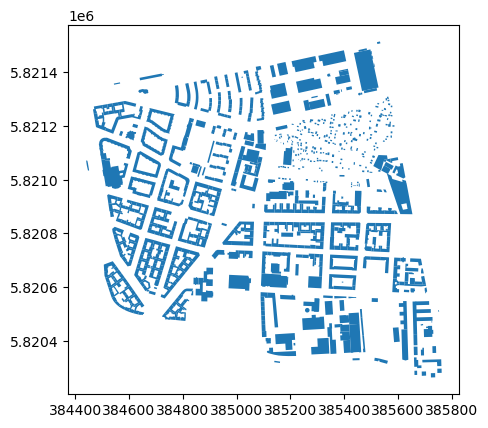

In [4]:
# get data for cea 
# Load Building level data and shape file
CEA_shape_path = os.path.join('data', 'evaluation', 'cea', 'building-geometry' ,'zone.shp')
CEA_shape = gpd.read_file(CEA_shape_path)
CEA_shape.plot()

In [5]:
CEA_shape.head()
# load building level data from TEDEM

,Name,height_ag,floors_ag,height_bg,floors_bg,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country,geometry
0,B1000,2.0,2,3.0,1,NaN,school,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((384874.043 5820594.084, 384873.807 5..."
1,B1001,3.0,3,3.0,1,NaN,service,OSM - as it is,10,Lise-Meitner-Straße,10589,NaN,NaN,Berlin,DE,"POLYGON ((385147.715 5821181.978, 385145.006 5..."
2,B1002,1.0,1,3.0,1,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((385315.603 5820595.263, 385265.770 5..."
3,B1003,1.0,1,3.0,1,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((385231.453 5820685.213, 385230.993 5..."
4,B1004,6.0,6,3.0,1,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((385092.809 5820650.440, 385096.097 5..."


In [6]:
# load building level data from TEDEM
tecdem_data = pd.read_csv(r'data\evaluation\TECDEM\Mierendorff_GML_updated.csv', index_col=0)
tecdem_data.head()



,gml_id,dg_id,address,building_type_gml,year_of_construction,renovation_status,floor_area,height,storeys_above_ground,average_floor_height
5,DEBE3D04YY50000BlO,0,"Germany,Berlin,Charlottenburg-Wilmersdorf,/,Mi...",31001_1010,1900.0,NaN,795.406738,23.220,NaN,2.8
8,DEBE3D04YY50000Rac,1,"Germany,Berlin,Charlottenburg-Wilmersdorf,/,Ka...",31001_1010,1905.0,NaN,724.393066,24.421,NaN,2.8
10,DEBE3D04YY50000DCT,2,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2463,1905.0,NaN,23.834473,2.867,NaN,2.8
12,DEBE3D04YY50000Lev,3,"Germany,Berlin,Charlottenburg-Wilmersdorf,Tege...",31001_1010,1905.0,NaN,196.167480,22.963,NaN,2.8
14,DEBE3D04YY500002JB,4,"Germany,Berlin,Charlottenburg-Wilmersdorf,Mier...",31001_1010,1905.0,NaN,501.797363,24.448,NaN,2.8


<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x27391fc6480>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x27391efd880>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x2739a313e80>
<Element {http://www.opengis.net/citygml/1.0}CityModel at 0x2739a378540>


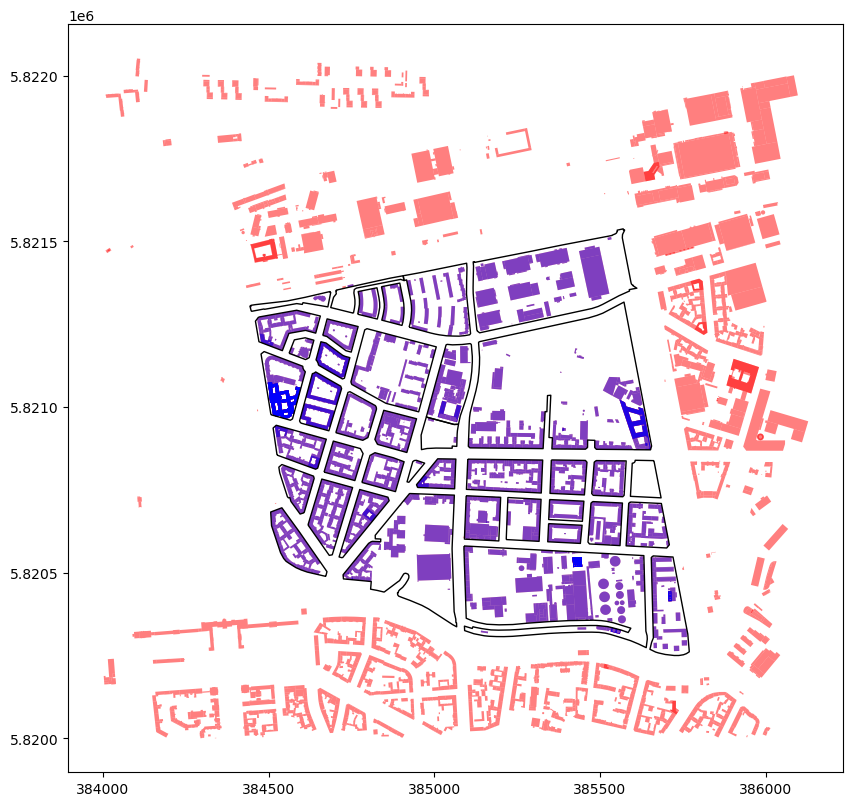

In [7]:
# Map GML ID to CEA ID 
import lxml.etree as ET
import shapely.geometry as geom
import matplotlib.pyplot as plt

ns = {
    'gml': 'http://www.opengis.net/gml',
    'bldg': 'http://www.opengis.net/citygml/building/2.0',
     'bldg' :"http://www.opengis.net/citygml/building/1.0"
}
# Code taken from https://github.com/TUB-DVG/TECDEM/blob/main/experiments/92a_ModelUpdatedGML.ipynb 

# ToDo - Write function to get building and building part IDs
gml_files = [os.path.join('data', 'examples', 'gml_data', file) for file in os.listdir(r'data\examples\gml_data') if file.endswith('.xml')]
# Extract building geometries along with their IDs

# Load shapefile
shapefile_path = os.path.join('data', 'examples', 'block_shape', '00_block_shape.shp')
blocks_gdf = gpd.read_file(shapefile_path)

# Get the relevant blocks at the innner mierendorff Insel
outer_mierendorff = ["019609", "019017", "019808", "019901", "020902", "019708"]
blocks_gdf['blknr'] = blocks_gdf["blknr"].astype(str)
blocks_gdf = blocks_gdf[~blocks_gdf["blknr"].isin(outer_mierendorff)]

def extract_ground_surface_polygons_with_ids(gml_root):
    buildings = []

    # Iterate over each building
    for bldg in gml_root.findall('.//{*}Building', ns):
        bldg_id = bldg.get('{http://www.opengis.net/gml}id')
        #print(bldg)

        # Find all GroundSurface elements within the boundedBy elements
        for ground_surface in bldg.findall('.//{*}GroundSurface', ns):
            pos_list_elements = ground_surface.findall('.//gml:posList', ns)
            if pos_list_elements is not None:
                for geom_elem in pos_list_elements:
                    pos_list = geom_elem.text.split()
                    if len(pos_list) % 3 != 0:
                        print(f"Warning: posList does not contain triplets of coordinates: {pos_list}")
                        continue
                    try:
                        # Convert coordinates to a 2D polygon (ignoring z-values)
                        exterior_coords = []
                        interior_coords = []
                        
                        # Find exterior coordinates
                        exterior = ground_surface.find('.//gml:exterior//gml:posList', ns)
                        if exterior is not None:
                            exterior_pos_list = exterior.text.split()
                            exterior_coords = [(float(exterior_pos_list[i]), float(exterior_pos_list[i + 1])) for i in range(0, len(exterior_pos_list), 3)]
                        
                        # Find interior coordinates
                        interiors = ground_surface.findall('.//gml:interior//gml:posList', ns)
                        for interior in interiors:
                            interior_pos_list = interior.text.split()
                            interior_coords.append([(float(interior_pos_list[i]), float(interior_pos_list[i + 1])) for i in range(0, len(interior_pos_list), 3)])
                        
                        # Create polygon with exterior and interior (holes)
                        polygon = geom.Polygon(exterior_coords, interior_coords)
                        buildings.append({'geometry': polygon, 'gml_id': bldg_id})
                    except Exception as e:
                        print(f"Error creating polygon for building {bldg_id}: {e}")
            else:
                # Alternatively, check for 'Polygon' elements under GroundSurface
                for poly in ground_surface.findall('.//gml:Polygon', ns):
                    exterior_coords = []
                    interior_coords = []
                    
                    # Find exterior coordinates
                    exterior = poly.find('.//gml:exterior//gml:posList', ns)
                    if exterior is not None:
                        exterior_pos_list = exterior.text.split()
                        if len(exterior_pos_list) % 3 != 0:
                            print(f"Warning: exterior posList does not contain triplets of coordinates: {exterior_pos_list}")
                            continue
                        exterior_coords = [(float(exterior_pos_list[i]), float(exterior_pos_list[i + 1])) for i in range(0, len(exterior_pos_list), 3)]
                    
                    # Find interior coordinates
                    interiors = poly.findall('.//gml:interior//gml:posList', ns)
                    for interior in interiors:
                        interior_pos_list = interior.text.split()
                        if len(interior_pos_list) % 3 != 0:
                            print(f"Warning: interior posList does not contain triplets of coordinates: {interior_pos_list}")
                            continue
                        interior_coords.append([(float(interior_pos_list[i]), float(interior_pos_list[i + 1])) for i in range(0, len(interior_pos_list), 3)])
                    
                    try:
                        # Create polygon with exterior and interior (holes)
                        polygon = geom.Polygon(exterior_coords, interior_coords)
                        buildings.append({'geometry': polygon, 'gml_id': bldg_id})
                    except Exception as e:
                        print(f"Error creating polygon for building {bldg_id}: {e}")

    return buildings



# Now, update the code to use the modified function
list_buildings = []
for gml_file in gml_files:
    tree = ET.parse(gml_file)
    root = tree.getroot()
    # Use the modified function that extracts only ground surfaces
    print(root)
    buildings = extract_ground_surface_polygons_with_ids(root)
    list_buildings.extend(buildings)  # Use extend to flatten the list

# Check if we have extracted any buildings
if not list_buildings:
    print("No buildings were extracted from the GML files.")
else:
    # Convert to GeoDataFrame
    buildings_gdf = gpd.GeoDataFrame(list_buildings, crs=blocks_gdf.crs)
    # Select columns using a list instead of a tuple
    columns_to_keep = ['blknr', 'plr', 'blktypname', 'ewk', 'area', 'geometry']
    blocks_gdf = blocks_gdf[columns_to_keep]
    # Check if buildings are within blocks
    buildings_gdf = buildings_gdf.reset_index(drop=True)
    blocks_gdf = blocks_gdf.reset_index(drop=True)
    within_blocks = gpd.sjoin(buildings_gdf, blocks_gdf, how='inner', predicate='intersects')


    # Optional: Plotting the results for visual inspection
    fig, ax = plt.subplots(figsize=(10, 10))
    blocks_gdf.boundary.plot(ax=ax, linewidth=1, edgecolor='black')
    buildings_gdf.plot(ax=ax, color='red', alpha=0.5)
    within_blocks.plot(ax=ax, color='blue', alpha=0.5)
    plt.show()

In [8]:
within_blocks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1641 entries, 5 to 3396
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   geometry     1641 non-null   geometry
 1   gml_id       1641 non-null   object  
 2   index_right  1641 non-null   int64   
 3   blknr        1641 non-null   object  
 4   plr          1641 non-null   object  
 5   blktypname   1641 non-null   object  
 6   ewk          1641 non-null   object  
 7   area         1641 non-null   float64 
dtypes: float64(1), geometry(1), int64(1), object(5)
memory usage: 115.4+ KB


C:\Users\felix\AppData\Local\Temp\ipykernel_18032\387111511.py:28: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:32633
Right CRS: EPSG:25833

  overlap = gpd.overlay(CEA_shape, within_blocks, how='intersection')
C:\Users\felix\AppData\Local\Temp\ipykernel_18032\387111511.py:39: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Total overlap area: 364893.50 square units


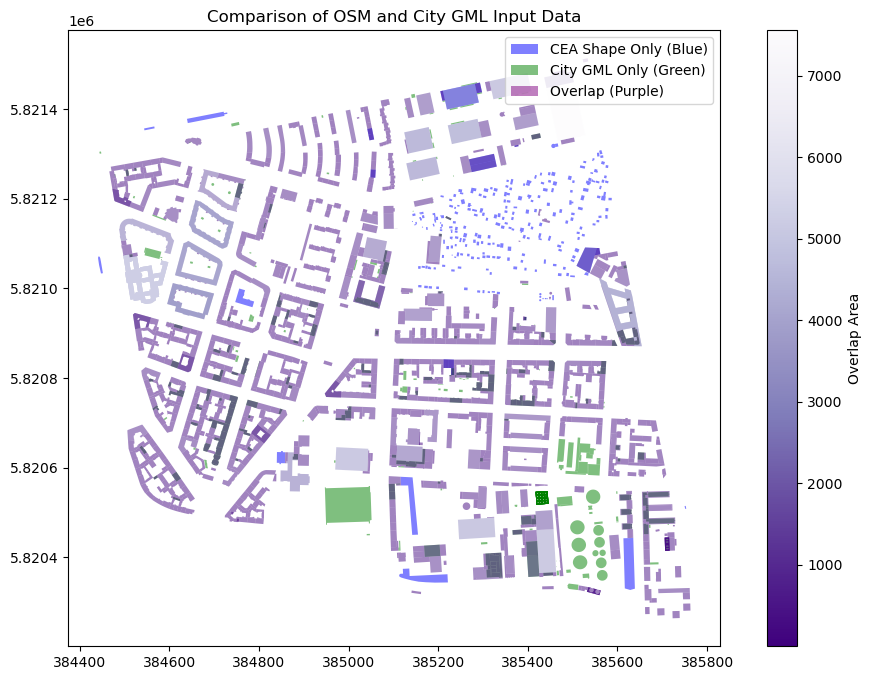

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.validation import make_valid

# Plot CEA_shape and within_blocks in the same plot
fig, ax = plt.subplots(figsize=(12, 8))

# Function to clean and validate geometries
def clean_geometry(gdf):
    gdf['geometry'] = gdf['geometry'].apply(lambda geom: make_valid(geom) if not geom.is_valid else geom)
    return gdf

# Clean and validate geometries
CEA_shape = clean_geometry(CEA_shape)
within_blocks = clean_geometry(within_blocks)

# Plot CEA_shape only data
cea_only = CEA_shape[~CEA_shape.geometry.overlaps(within_blocks.geometry.unary_union)]
cea_only.plot(ax=ax, color='blue', alpha=0.5, label='CEA Shape Only (Blue)')

# Plot within_blocks only data
blocks_only = within_blocks[~within_blocks.geometry.overlaps(CEA_shape.geometry.unary_union)]
blocks_only.plot(ax=ax, color='green', alpha=0.5, label='City GML Only (Green)')

# Calculate and plot overlap
try:
    overlap = gpd.overlay(CEA_shape, within_blocks, how='intersection')
    overlap['overlap_area'] = overlap.geometry.area
    overlap.plot(ax=ax, column='overlap_area', cmap='Purples_r', alpha=0.5, legend=True, legend_kwds={'label': 'Overlap Area'})
    
    # Print total overlap area
    print(f"Total overlap area: {overlap['overlap_area'].sum():.2f} square units")
except Exception as e:
    print(f"Error during overlay: {e}")
    print("Overlap could not be calculated.")

# Add legend
ax.legend()

# Add title and labels
plt.title('Comparison of OSM and City GML Input Data')
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,fc="blue", alpha=0.5, label="CEA Shape Only (Blue)"),
    plt.Rectangle((0,0),1,1,fc="green", alpha=0.5, label="City GML Only (Green)"),
    plt.Rectangle((0,0),1,1,fc="Purple", alpha=0.5, label="Overlap (Purple)")
])

# Show the plot
plt.show()

C:\Users\felix\AppData\Local\Temp\ipykernel_18032\2231815637.py:31: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:32633
Right CRS: EPSG:25833

  overlap = gpd.overlay(CEA_shape, within_blocks, how='intersection')


Total overlap area: 364893.50 square units


<Figure size 640x480 with 0 Axes>

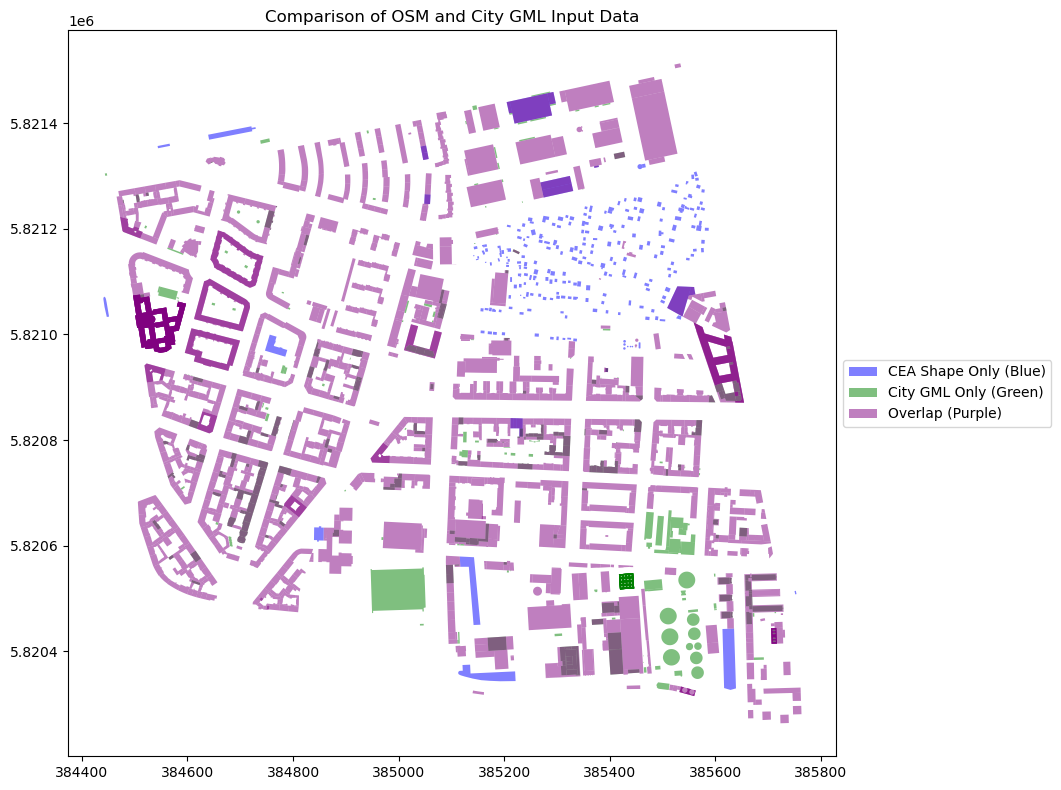

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.validation import make_valid

# Clear any existing plots
plt.clf()

# Plot CEA_shape and within_blocks in the same plot
fig, ax = plt.subplots(figsize=(12, 8))

# Function to clean and validate geometries
def clean_geometry(gdf):
    gdf['geometry'] = gdf['geometry'].apply(lambda geom: make_valid(geom) if not geom.is_valid else geom)
    return gdf

# Clean and validate geometries
CEA_shape = clean_geometry(CEA_shape)
within_blocks = clean_geometry(within_blocks)

# Plot CEA_shape only data
cea_only = CEA_shape[~CEA_shape.geometry.overlaps(within_blocks.geometry.unary_union)]
cea_only.plot(ax=ax, color='blue', alpha=0.5, label='CEA Shape Only (Blue)')

# Plot within_blocks only data
blocks_only = within_blocks[~within_blocks.geometry.overlaps(CEA_shape.geometry.unary_union)]
blocks_only.plot(ax=ax, color='green', alpha=0.5, label='City GML Only (Green)')

# Calculate and plot overlap
try:
    overlap = gpd.overlay(CEA_shape, within_blocks, how='intersection')
    overlap.plot(ax=ax, color='purple', alpha=0.5, label='Overlap (Purple)')
    
    # Print total overlap area
    print(f"Total overlap area: {overlap.geometry.area.sum():.2f} square units")
except Exception as e:
    print(f"Error during overlay: {e}")
    print("Overlap could not be calculated.")

# Add legend
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,fc="blue", alpha=0.5, label="CEA Shape Only (Blue)"),
    plt.Rectangle((0,0),1,1,fc="green", alpha=0.5, label="City GML Only (Green)"),
    plt.Rectangle((0,0),1,1,fc="purple", alpha=0.5, label="Overlap (Purple)")
], loc='center left', bbox_to_anchor=(1, 0.5))

# Add title
plt.title('Comparison of OSM and City GML Input Data')

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\felix\AppData\Local\Temp\ipykernel_18032\2943492717.py:31: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:32633
Right CRS: EPSG:25833

  overlap = gpd.overlay(CEA_shape, within_blocks, how='intersection')


Total overlap area: 364893.50 square units


<Figure size 640x480 with 0 Axes>

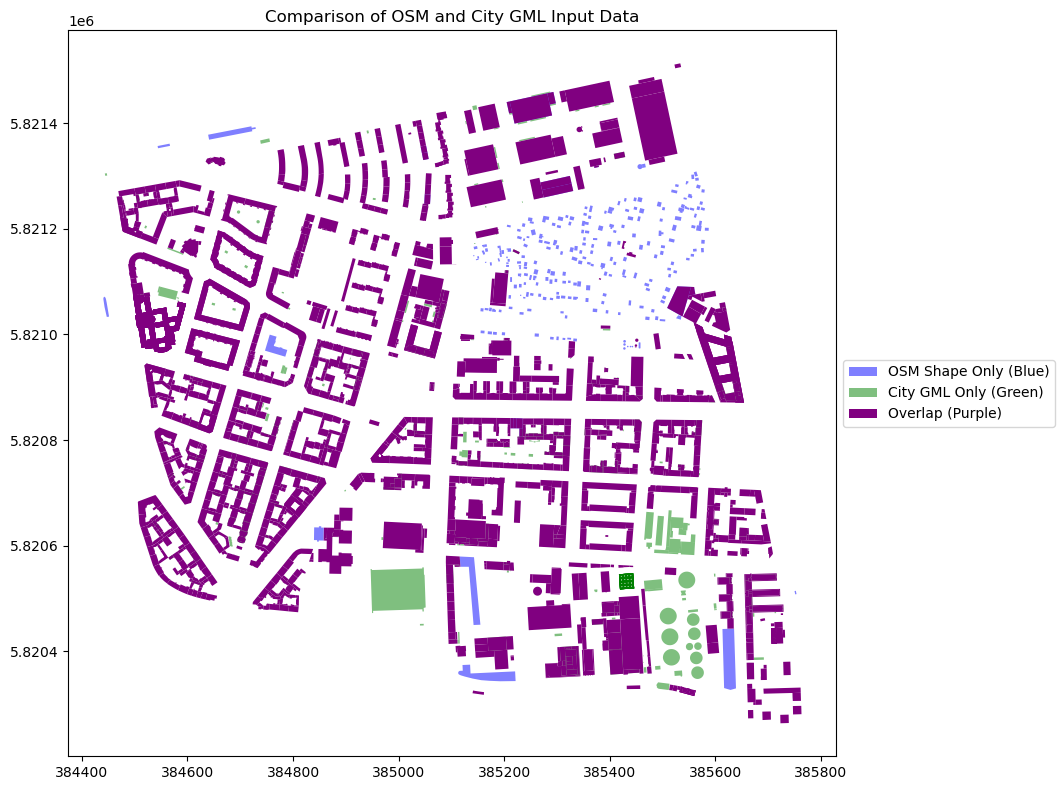

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from shapely.validation import make_valid

# Clear any existing plots
plt.clf()

# Plot CEA_shape and within_blocks in the same plot
fig, ax = plt.subplots(figsize=(12, 8))

# Function to clean and validate geometries
def clean_geometry(gdf):
    gdf['geometry'] = gdf['geometry'].apply(lambda geom: make_valid(geom) if not geom.is_valid else geom)
    return gdf

# Clean and validate geometries
CEA_shape = clean_geometry(CEA_shape)
within_blocks = clean_geometry(within_blocks)

# Plot CEA_shape only data
cea_only = CEA_shape[~CEA_shape.geometry.overlaps(within_blocks.geometry.unary_union)]
cea_only.plot(ax=ax, color='blue', alpha=0.5, label='OSM Shape Only (Blue)')

# Plot within_blocks only data
blocks_only = within_blocks[~within_blocks.geometry.overlaps(CEA_shape.geometry.unary_union)]
blocks_only.plot(ax=ax, color='green', alpha=0.5, label='City GML Only (Green)')

# Calculate and plot overlap
try:
    overlap = gpd.overlay(CEA_shape, within_blocks, how='intersection')
    overlap.plot(ax=ax, color='purple', label='Overlap (Purple)')  # Removed alpha for solid fill
    
    # Print total overlap area
    print(f"Total overlap area: {overlap.geometry.area.sum():.2f} square units")
except Exception as e:
    print(f"Error during overlay: {e}")
    print("Overlap could not be calculated.")

# Add legend
plt.legend(handles=[
    plt.Rectangle((0,0),1,1,fc="blue", alpha=0.5, label="OSM Shape Only (Blue)"),
    plt.Rectangle((0,0),1,1,fc="green", alpha=0.5, label="City GML Only (Green)"),
    plt.Rectangle((0,0),1,1,fc="purple", label="Overlap (Purple)")  # Removed alpha for solid fill
], loc='center left', bbox_to_anchor=(1, 0.5))

# Add title
plt.title('Comparison of OSM and City GML Input Data')

# Adjust layout to prevent cutting off the legend
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
# spatial merge of within_blocks with data from cea

within_blocks.to_crs(CEA_shape.crs)
# Check and rename columns if necessary
if 'index_left' in within_blocks.columns:
    within_blocks = within_blocks.rename(columns={'index_left': 'index_left_'})
if 'index_right' in within_blocks.columns:
    within_blocks = within_blocks.rename(columns={'index_right': 'index_right_'})

"""if 'index_left' in CEA_shape.columns:
    CEA_shape = CEA_shape.rename(columns={'index_left': 'index_left_'})
if 'index_right' in CEA_shape.columns:
    CEA_shape = CEA_shape.rename(columns={'index_right': 'index_right_'})
"""
# Now perform the spatial join
within_blocks = within_blocks.to_crs(CEA_shape.crs)
merged_gdf = gpd.sjoin(within_blocks, CEA_shape, how='inner', predicate='intersects')
merged_gdf.drop_duplicates()

,geometry,gml_id,index_right_,blknr,plr,blktypname,ewk,area,index_right,Name,...,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,"POLYGON ((384982.867 5820756.296, 384983.381 5...",DEBE3D04YY500002HZ,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,"POLYGON ((384988.955 5820786.719, 384983.965 5...",DEBE3D04YY50000PO8,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,"POLYGON ((384976.272 5820790.551, 384970.271 5...",DEBE3D04YY50000PO8,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,315,B1315,...,NaN,yes,OSM - as it is,7A,Gaußstraße,10589,NaN,NaN,Berlin,DE
3306,"POLYGON ((385382.860 5821391.903, 385380.416 5...",DEBE3D04AL54V00006,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3331,"POLYGON ((385384.255 5821385.441, 385384.198 5...",DEBE3D04AL54V00003,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,459,B1459,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
list(merged_gdf[merged_gdf["gml_id"] == "DEBE3D04YY50000BlO"]["Name"])

['B1116', 'B1116', 'B1115', 'B1115']

<Axes: >

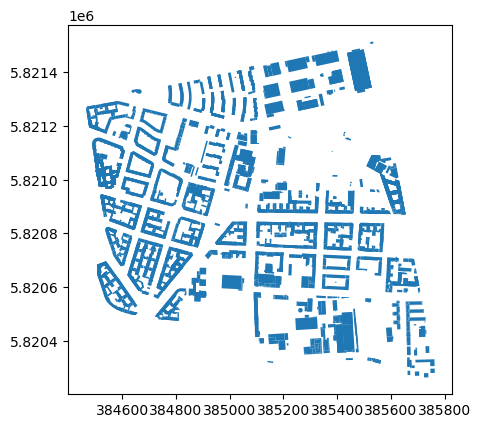

In [14]:
merged_gdf.plot()


<Axes: >

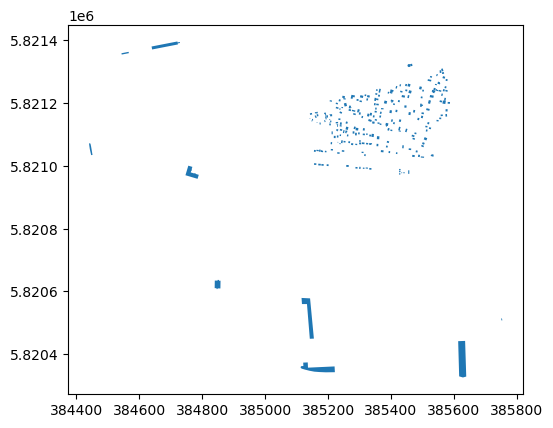

In [15]:
# Buildings only in cea
CEA_shape[~CEA_shape["Name"].isin(merged_gdf["Name"])].plot()


<Axes: >

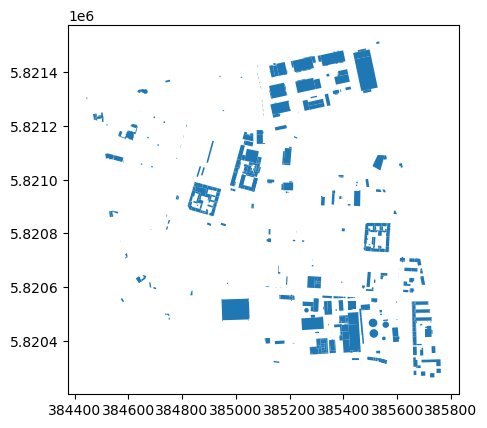

In [16]:
# Buildings not in SimStadt
SimStadt_buildings = list(df_SimStadt["GMLId"].unique())
SimStadt_buildings.extend(list(df_SimStadt["ParentGMLId"].unique()))
SimStadt_buildings.extend(list(df_SimStadt))

# Building that are NOT in Simstadt 
within_blocks[~within_blocks["gml_id"].isin(SimStadt_buildings)].plot()

<Axes: >

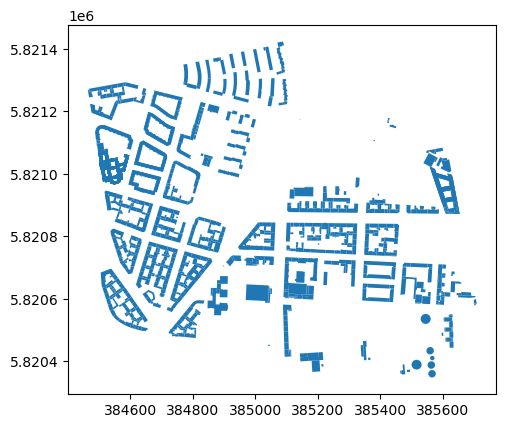

In [17]:
# Building that are Simstadt 
within_blocks[within_blocks["gml_id"].isin(SimStadt_buildings)].plot()

In [18]:
# Figure out reasons why the buildings are not in Simstadt results
not_in_Simstadt = [x for x in within_blocks["gml_id"] if x not in SimStadt_buildings]

import re
import os

# Function to search for a GML ID in a log file
def search_gml_id_in_log(file_path, gml_id):
    with open(file_path, 'r') as file:
        content = file.read()
        # Search for the GML ID in the content
        match = re.search(rf'{gml_id}.*', content)
        if match:
            return match.group(0)
    return None

# Directory containing the log files
log_dir = 'data/evaluation/SimStadt'

# Dictionary to store results
results = {}


# Function to search for a GML ID and its exclusion reason in a log file
def search_gml_id_and_reason_in_log(file_path, gml_id):
    with open(file_path, 'r') as file:
        content = file.read()
        # Search for the exclusion reason
        reason_match = re.search(r'Excluded \d+ buildings? from processing \(reason: (.+?)\)', content)
        reason = reason_match.group(1) if reason_match else "Unknown reason"
        
        # Search for the GML ID in the content
        match = re.search(rf'{gml_id}.*', content)
        if match:
            return (reason, match.group(0))
    return None

# Update the loop to use the new function
for gml_id in not_in_Simstadt:
    results[gml_id] = []
    
    for filename in os.listdir(log_dir):
        if filename.endswith('.log'):
            file_path = os.path.join(log_dir, filename)
            result = search_gml_id_and_reason_in_log(file_path, gml_id)
            if result:
                results[gml_id].append((filename, *result))

# Print the updated results
for gml_id, matches in results.items():
    print(f"GML ID: {gml_id}")
    if matches:
        for filename, reason, match in matches:
            print(f"  Found in {filename}:")
            print(f"    Reason: {reason}")
            print(f"    Match: {match}")
    else:
        print("  Not found in any log file")
    print()



GML ID: DEBE3D04YY50000LDg
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000LDg;139,70;58,48;384698,22050;5820596,12550;-

GML ID: DEBE3D04YY50000GQP
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000GQP;235,86;94,77;384681,58200;5820607,90300;-

GML ID: DEBE3D04YY500005mD
  Not found in any log file

GML ID: DEBE3D04YY50000R2f
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000R2f;175,30;58,42;384743,96700;5820819,54450;-

GML ID: DEBE3D04YY50002bU7
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50002bU7;0,79;5,90;384684,21850;5820813,98750;-

GML ID: DEBE3D04YY50000JjD
  Found in LoD2_33_384_5820_1_BE_DIN18599_HEATING.log:
    Reason: Unknown ALKIS code: 1610
    Match: DEBE3D04YY50000JjD;161,80;73,32;384750,96650;5820

In [19]:
merged_gdf[merged_gdf["gml_id"].isin(tecdem_data["gml_id"])]

,geometry,gml_id,index_right_,blknr,plr,blktypname,ewk,area,index_right,Name,...,descriptio,category,REFERENCE,house_no,street,postcode,house_name,resi_type,city,country
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
816,"POLYGON ((384982.867 5820756.296, 384983.381 5...",DEBE3D04YY500002HZ,24,020050,04300518,Block,100-999 Einwohner,7815.945312,116,B1116,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"POLYGON ((384976.272 5820790.551, 384977.076 5...",DEBE3D04YY50000BlO,24,020050,04300518,Block,100-999 Einwohner,7815.945312,115,B1115,...,NaN,apartments,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,315,B1315,...,NaN,yes,OSM - as it is,7A,Gaußstraße,10589,NaN,NaN,Berlin,DE
3306,"POLYGON ((385382.860 5821391.903, 385380.416 5...",DEBE3D04AL54V00006,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3331,"POLYGON ((385384.255 5821385.441, 385384.198 5...",DEBE3D04AL54V00003,1,019692,04300518,Block,unbewohnt,96460.437500,503,B1503,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3352,"POLYGON ((385424.206 5821364.168, 385372.529 5...",DEBE3D04AL54V00000,1,019692,04300518,Block,unbewohnt,96460.437500,459,B1459,...,NaN,yes,OSM - as it is,NaN,NaN,NaN,NaN,NaN,NaN,NaN


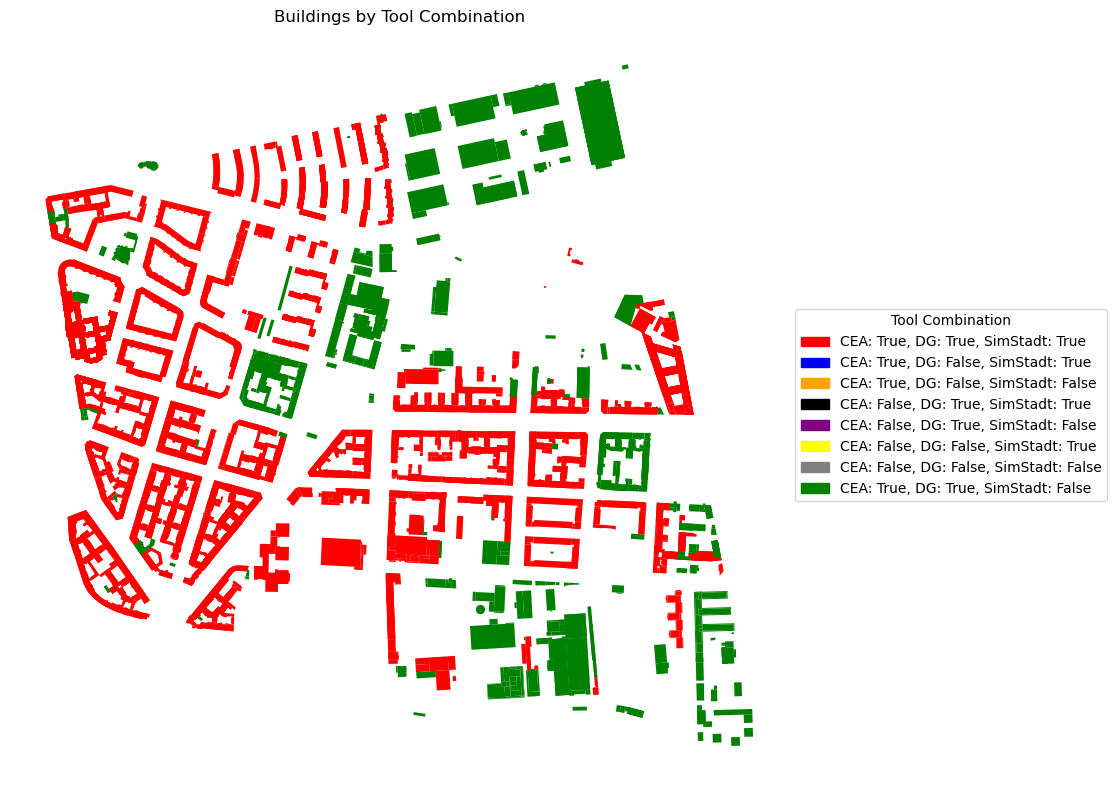

In [20]:
# Adjust this code later, so the finally modled buildings are shown

# Create boolean columns for each tool
merged_gdf["CEA"] = merged_gdf["Name"].isin(CEA_shape["Name"].tolist())
merged_gdf["districtgenerator"] = merged_gdf["gml_id"].isin(tecdem_data["gml_id"].tolist())
merged_gdf["SimStadt"] = merged_gdf["gml_id"].isin(SimStadt_buildings)

# Define color mapping for all possible combinations with more varied colors
color_map = {
    (True, True, True): 'red',
    
    (True, False, True): 'blue',
    (True, False, False): 'orange',
    (False, True, True): 'black',
    (False, True, False): 'purple',
    (False, False, True): 'yellow',
    (False, False, False): 'gray',
    (True, True, False): 'green',
}

# Create a new column with colors based on the combination
merged_gdf['color'] = merged_gdf.apply(lambda row: color_map[(row['CEA'], row['districtgenerator'], row['SimStadt'])], axis=1)

# Plot the GeoDataFrame using a colormap for the 'color' column
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting with color categories
merged_gdf.plot(color=merged_gdf['color'], ax=ax, legend=True)

# Customize the legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in color_map.values()]
labels = [f"CEA: {c[0]}, DG: {c[1]}, SimStadt: {c[2]}" for c in color_map.keys()]
plt.legend(handles, labels, title='Tool Combination', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Buildings by Tool Combination')
plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
# To-Do:
# Calculate number of buildings for CEA and CityGML
# Check Metadta and the completeness


In [22]:
# Calculate the number of buildings in CEA_shape and within_blocks
num_buildings_cea = len(CEA_shape)
num_buildings_within_blocks = len(within_blocks["gml_id"].drop_duplicates())

print(f"Number of buildings in CEA_shape: {num_buildings_cea}")
print(f"Number of buildings in within_blocks: {num_buildings_within_blocks}")

# Calculate the difference in building counts
difference = abs(num_buildings_cea - num_buildings_within_blocks)
print(f"Difference in building counts: {difference}")

# Calculate the percentage difference
if num_buildings_cea > 0 and num_buildings_within_blocks > 0:
    percentage_difference = (difference / min(num_buildings_cea, num_buildings_within_blocks)) * 100
    print(f"Percentage difference: {percentage_difference:.2f}%")
else:
    print("Unable to calculate percentage difference due to zero values.")


Number of buildings in CEA_shape: 791
Number of buildings in within_blocks: 673
Difference in building counts: 118
Percentage difference: 17.53%


In [23]:
import xml.etree.ElementTree as ET
import pandas as pd

def extract_building_tags(gml_files):
    # Define namespaces
    namespaces = {
        'gml': 'http://www.opengis.net/gml',
        'bldg': 'http://www.opengis.net/citygml/building/2.0',
        'gen': 'http://www.opengis.net/citygml/generics/2.0',
        'xAL': 'urn:oasis:names:tc:ciq:xsdschema:xAL:2.0'
    }

    all_tags = set()

    for gml_file in gml_files:
        # Find all unique tags in all buildings
        for bldg in root.findall('.//{*}Building', namespaces):
            for elem in bldg.iter():
                tag = elem.tag.split('}')[-1]  # Remove namespace
        # Find all unique tags in all buildings
        for bldg in root.findall('.//{*}Building', ns):
            for elem in bldg.iter():
                tag = elem.tag.split('}')[-1]  # Remove namespace
                all_tags.add(tag)

    return all_tags


    
def extract_building_attributes(gml_files, all_tags):
    # Define namespaces
    namespaces = {
        'gml': 'http://www.opengis.net/gml',
        'bldg': 'http://www.opengis.net/citygml/building/2.0',
        'gen': 'http://www.opengis.net/citygml/generics/2.0',
        'xAL': 'urn:oasis:names:tc:ciq:xsdschema:xAL:2.0'
    }
    # Initialize a list to store building data
    building_data = []

    for gml_file in gml_files:
        # Parse the GML file
        tree = ET.parse(gml_file)
        root = tree.getroot()

        # Iterate through all buildings in the GML file
        for building in root.findall('.//{*}Building', namespaces):
            gml_id = building.get('{http://www.opengis.net/gml}id')
            
            # Initialize attributes dictionary with all tags
            attributes = {tag: None for tag in all_tags}
            attributes['gml_id'] = gml_id

            # Extract values for each tag if it exists
            for elem in building.iter():
                tag = elem.tag.split('}')[-1]  # Remove namespace
                if tag in attributes:
                    attributes[tag] = elem.text

            # Extract generic attributes
            for generic_attribute in building.findall('.//{*}gen:stringAttribute', namespaces):
                name = generic_attribute.get('name')
                value = generic_attribute.find('gen:value', namespaces).text
                attributes[name] = value

            building_data.append(attributes)

    return pd.DataFrame(building_data)

gml_files = [os.path.join('data', 'examples', 'gml_data', file) for file in os.listdir(r'data\examples\gml_data') if file.endswith('.xml')]


# Extract building attributes
building_tags = extract_building_tags(gml_files)

buildings_attributes_df = extract_building_attributes(gml_files, building_tags)

# Filter the dataframe to include only buildings in within_blocks["gml_id"]
filtered_df = buildings_attributes_df[buildings_attributes_df['gml_id'].isin(within_blocks["gml_id"])]

# Display the first few rows of the resulting dataframe
print(filtered_df)

# Save the dataframe to a CSV file if needed
# filtered_df.to_csv('building_attributes.csv', index=False)



                  Locality            LineString              name  \
5     \n                        \n                DEBE04YY50000BlO   
8     \n                    \n                    DEBE04YY50000Rac   
10    \n                        \n                DEBE04YY50000DCT   
12    \n                        \n                DEBE04YY50000Lev   
14    \n                    \n                    DEBE04YY500002JB   
...                    ...                   ...               ...   
1502  \n                    \n                    DEBE04AL2vw0000q   
1504  \n                        \n                DEBE04YY500005p2   
1506  \n                        \n                DEBE04YY50000PWf   
1517  \n                    \n                    DEBE00YYNv0000Bv   
1520  \n                        \n                DEBE04YY50002cJh   

      BuildingPart                    exterior       RoofSurface  \
5             None      \n                          \n             
8     \n            \n 

In [24]:
# Replace all whitespace-only strings with None using regex
filtered_df = filtered_df.replace(r'^\s+$', None, regex=True)


In [25]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 673 entries, 5 to 1520
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Locality                 0 non-null      object
 1   LineString               0 non-null      object
 2   name                     673 non-null    object
 3   BuildingPart             0 non-null      object
 4   exterior                 0 non-null      object
 5   RoofSurface              0 non-null      object
 6   lod2Solid                0 non-null      object
 7   lod2TerrainIntersection  0 non-null      object
 8   Solid                    0 non-null      object
 9   xalAddress               0 non-null      object
 10  informationSystem        673 non-null    object
 11  address                  0 non-null      object
 12  surfaceMember            0 non-null      object
 13  ThoroughfareName         362 non-null    object
 14  measuredHeight           673 non-null    objec

In [26]:
relevant_metadata = ["roofType", "AddressDetails", "informationSystem", "creationDate", "function", "measuredHeight"]

In [27]:

for metadata in relevant_metadata:
    print(f"\n{metadata}:")
    print(filtered_df[metadata].info())
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(filtered_df[metadata]):
        print(f"Range: {filtered_df[metadata].min()} to {filtered_df[metadata].max()}")
    else:
        # For non-numeric columns, print unique values
        unique_values = filtered_df[metadata].unique()
        print(f"Unique values: {unique_values}")
        print(f"Number of unique values: {len(unique_values)}")


roofType:
<class 'pandas.core.series.Series'>
Index: 673 entries, 5 to 1520
Series name: roofType
Non-Null Count  Dtype 
--------------  ----- 
673 non-null    object
dtypes: object(1)
memory usage: 10.5+ KB
None
Unique values: ['5000' '1000' '9999' '3100' '3200' '3500']
Number of unique values: 6

AddressDetails:
<class 'pandas.core.series.Series'>
Index: 673 entries, 5 to 1520
Series name: AddressDetails
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 10.5+ KB
None
Unique values: [None]
Number of unique values: 1

informationSystem:
<class 'pandas.core.series.Series'>
Index: 673 entries, 5 to 1520
Series name: informationSystem
Non-Null Count  Dtype 
--------------  ----- 
673 non-null    object
dtypes: object(1)
memory usage: 10.5+ KB
None
Unique values: ['http://repository.gdi-de.org/schemas/adv/citygml/fdv/art.htm#_9100']
Number of unique values: 1

creationDate:
<class 'pandas.core.series.Series'>
Index: 673 entries, 5 to 1520

In [28]:
for column in CEA_shape.columns:
    print(f"\n{column}:")
    print(CEA_shape[column].info())
    
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(CEA_shape[column]):
        print(f"Range: {CEA_shape[column].min()} to {CEA_shape[column].max()}")
    else:
        # For non-numeric columns, print unique values
        unique_values = CEA_shape[column].unique()
        print(f"Unique values: {unique_values}")
        print(f"Number of unique values: {len(unique_values)}")


Name:
<class 'pandas.core.series.Series'>
RangeIndex: 791 entries, 0 to 790
Series name: Name
Non-Null Count  Dtype 
--------------  ----- 
791 non-null    object
dtypes: object(1)
memory usage: 6.3+ KB
None
Unique values: ['B1000' 'B1001' 'B1002' 'B1003' 'B1004' 'B1005' 'B1006' 'B1007' 'B1008'
 'B1009' 'B1010' 'B1011' 'B1012' 'B1013' 'B1014' 'B1015' 'B1016' 'B1017'
 'B1018' 'B1019' 'B1020' 'B1021' 'B1022' 'B1023' 'B1024' 'B1025' 'B1026'
 'B1027' 'B1028' 'B1029' 'B1030' 'B1031' 'B1032' 'B1033' 'B1034' 'B1035'
 'B1036' 'B1037' 'B1038' 'B1039' 'B1040' 'B1041' 'B1042' 'B1043' 'B1044'
 'B1045' 'B1046' 'B1047' 'B1048' 'B1049' 'B1050' 'B1051' 'B1052' 'B1053'
 'B1054' 'B1055' 'B1056' 'B1057' 'B1058' 'B1059' 'B1060' 'B1061' 'B1062'
 'B1063' 'B1064' 'B1065' 'B1066' 'B1067' 'B1068' 'B1069' 'B1070' 'B1071'
 'B1072' 'B1073' 'B1074' 'B1075' 'B1076' 'B1077' 'B1078' 'B1079' 'B1080'
 'B1081' 'B1082' 'B1083' 'B1084' 'B1085' 'B1086' 'B1087' 'B1088' 'B1089'
 'B1090' 'B1091' 'B1092' 'B1093' 'B1094' 'B109

In [29]:
# Now compare the size of the building areas 
# Start with the sum of all buildings
sum_cea = CEA_shape[CEA_shape['Name'].isin(merged_gdf['Name'])]["geometry"].area.sum()
sum_districtgenerator = tecdem_data["floor_area"].sum()
sum_SimstStadt = df_SimStadt["Footprint area"].sum()




In [30]:
sum_districtgenerator_SimStadt = tecdem_data[tecdem_data["gml_id"].isin(SimStadt_buildings)]["floor_area"].sum()
print("Sum of buildings in districtgenerator, that are differently modelled in SimStadt:",
      sum_districtgenerator_SimStadt)

Sum of buildings in districtgenerator, that are differently modelled in SimStadt: 265239.57275390625


In [31]:
print("Sum of heated area in Simstadt:", df_SimStadt['Heated area'].sum())

Sum of heated area in Simstadt: 1152177.5


In [32]:
# Figure out which buildings have the biggest difference in size difference between districtgenerator and SimStadt
# Cacluate sum of each gml_id in SimStadt and compare it against the sum in DG
area_df = pd.DataFrame()
df_SimStadt.groupby(["ParentGMLId"])

In [33]:
# Now compare the size of the building areas 
# Start with the sum of all buildings
sum_cea = CEA_shape[CEA_shape['Name'].isin(merged_gdf['Name'])]["geometry"].area.sum()
sum_districtgenerator = tecdem_data["floor_area"].sum()
sum_SimstStadt = df_SimStadt["Footprint area"].sum()



sum_districtgenerator_SimStadt = tecdem_data[tecdem_data["gml_id"].isin(SimStadt_buildings)]["floor_area"].sum()
print("Sum of buildings in districtgenerator, that are differently modelled in SimStadt:",
      sum_districtgenerator_SimStadt)



print("Sum of heated area in Simstadt:", df_SimStadt['Heated area'].sum())

# Figure out which buildings have the biggest difference in size difference between districtgenerator and SimStadt
# Cacluate sum of each gml_id in SimStadt and compare it against the sum in DG
area_df = pd.DataFrame()
area_df["gml_id"] = tecdem_data["gml_id"]
area_df["districtgenerator_area"] = tecdem_data["floor_area"].values
# Step 1: Group df_SimStadt by 'ParentGMLId' and sum the 'Footprint area' for each group
grouped_sum = df_SimStadt.groupby("ParentGMLId")["Footprint area"].sum()
# Step 2: Get 'Footprint area' for each GMLId directly from df_SimStadt
direct_sum = df_SimStadt.set_index("GMLId")["Footprint area"]
# Step 3: Combine the grouped sum and direct sum, aligning them by 'GMLId'
total_sum = grouped_sum.add(direct_sum, fill_value=0)
# Step 4: Reindex the combined result to match the 'gml_id' in area_df
area_df["simstadt_area"] = total_sum.reindex(area_df["gml_id"]).fillna(0).values



# Ensure both columns have the same length
assert len(area_df["districtgenerator_area"]) == len(area_df["simstadt_area"])



# Figure max difference
area_df["difference"] = abs(area_df["districtgenerator_area"] - area_df["simstadt_area"])


area_df.sort_values(["difference"], ascending=False)




area_df["factor"] = area_df.apply(lambda row: row["districtgenerator_area"] / row["simstadt_area"] if row["simstadt_area"] != 0.0 else float('nan'), axis=1)
# Remove rows with NaN factors
area_df = area_df.dropna(subset=['factor'])
# Sort the DataFrame by the 'factor' column in ascending order
area_df_sorted = area_df.sort_values('factor', ascending=True)


Sum of buildings in districtgenerator, that are differently modelled in SimStadt: 265239.57275390625
Sum of heated area in Simstadt: 1152177.5


In [34]:
area_df_sorted

,gml_id,districtgenerator_area,simstadt_area,difference,factor
123,DEBE3D04YY50000D8T,3.964844,4.0,0.035156,0.991211
202,DEBE3D04YY50000HI4,8.356445,8.4,0.043555,0.994815
104,DEBE3D04YY500005Xu,12.755615,12.8,0.044385,0.996532
172,DEBE3D04YY50000HmC,13.271973,13.3,0.028027,0.997893
155,DEBE3D04YY500009Fz,23.058594,23.1,0.041406,0.998208
...,...,...,...,...,...
411,DEBE3D04YY500009pj,5939.262939,3006.1,2933.162939,1.975737
234,DEBE3D04YY50000Ffk,385.906982,194.9,191.006982,1.980026
223,DEBE3D04YY500003fU,6629.514404,3341.2,3288.314404,1.984172
123,DEBE3D04YY5000058C,1193.725098,599.8,593.925098,1.990205


In [35]:
# Get all gml ids where the factor is bigger than 1.2
area_difference = list(area_df[area_df["factor"] > 1.2]["gml_id"])

<Axes: >

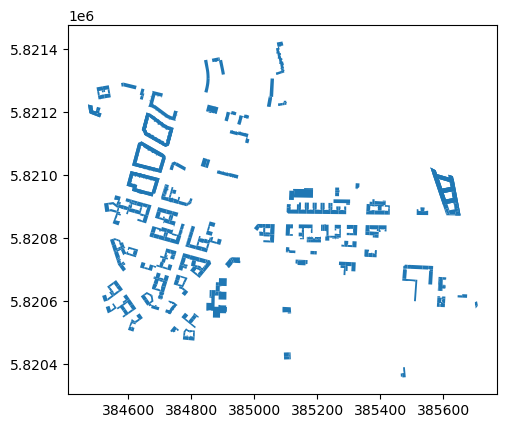

In [36]:
within_blocks[within_blocks["gml_id"].isin(area_difference)].plot()

In [37]:
# Get code for analysis of simulation results 
# SimStadt 


RESULTS_FOLDER = r'C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle'
# SimStadt\Mierendorff_2020
results_2020 = r'SimStadt\Mierendorff_2020.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step'

# SimStadt\Mierendorff_2021
results_2021 = r'SimStadt\Mierendorff_2021.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step'

# SimStadt\Mierendorff_2022
results_2022 = r'SimStadt\Mierendorff_2022.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step'

# Hourly results 2020
hourly_results_2020 = r'SimStadt\Mierendorff_2020.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step\a.step'


# Hourly results 2021
hourly_results_2021 = r'SimStadt\Mierendorff_2021.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step\a.step'

# Hourly results 2022
hourly_results_2022 = r'SimStadt\Mierendorff_2022.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step\a.step'


In [38]:
# get all results files in the folder
files = []
df = pd.DataFrame()
for file in os.listdir(os.path.join(RESULTS_FOLDER, results_2020)):
    if file.endswith('.csv'):
        files.append(os.path.join(RESULTS_FOLDER, results_2020, file))


skiprows = list(range(0, 19)) + [20]

# read all files into a pandas dataframe
df_18599 = pd.concat((pd.read_csv(file,  skiprows=skiprows,  sep=';', decimal=",") for file in files), ignore_index=True)

df_18599.head()

,GMLId,ParentGMLId,Latitude,Longitude,X-coordinate,Y-coordinate,LOD,Year of construction,Year of refurbishment,Refurbishment Variant,...,March Heating Demand,April Heating Demand,May Heating Demand,June Heating Demand,July Heating Demand,August Heating Demand,September Heating Demand,October Heating Demand,November Heating Demand,December Heating Demand
0,DEBE3DeVro4Xquwj,DEBE3D04YY50000Pqq,52.52602,13.29950,384637.20,5820905.42,LOD2,1905,NaN,Original,...,20040,6138,885,9,0,0,1753,12966,27121,38549
1,DEBE3DqljAotc5Mc,DEBE3D04YY50000JNV,52.52465,13.30034,384690.78,5820751.39,LOD2,1905,NaN,Original,...,4968,812,45,0,0,0,124,3356,9028,13768
2,DEBE3DSlz3JV8rPT,DEBE3D04YY50000Ncz,52.52392,13.30058,384705.24,5820669.45,LOD2,1905,NaN,Original,...,7751,2459,401,2,0,0,538,4810,11046,16462
3,DEBE3DNvy8Mr4hpJ,DEBE3D04YY500006oB,52.52250,13.30168,384776.17,5820510.11,LOD2,1905,NaN,Original,...,9051,1895,102,0,0,0,390,5742,13052,18632
4,DEBE3DOgQzlAY1Lv,DEBE3D04YY50000G12,52.52498,13.29933,384623.02,5820789.65,LOD2,1905,NaN,Original,...,3464,1082,169,2,0,0,277,2190,4654,6706


In [39]:
df_18599.columns

Index(['GMLId', 'ParentGMLId', 'Latitude', 'Longitude', 'X-coordinate',
       'Y-coordinate', 'LOD', 'Year of construction', 'Year of refurbishment',
       'Refurbishment Variant', 'ALKIS code', 'PrimaryUsageZoneType',
       'PrimaryUsageZoneArea', 'SecondaryUsageZoneType',
       'SecondaryUsageZoneArea', 'BuildingType', 'Footprint area',
       'Total wall thermal area above ground',
       'Total wall thermal area below ground', 'Total outwall area',
       'Total sharedwall area', 'Total roof area', 'Gross volume',
       'Is Gross volume approximated?', 'Heated volume', 'Ridge/mean Height',
       'Eaves/mean Height', 'Storey number', 'Average Storey Height',
       'Number of households', 'Number of occupants', 'Attic Heating',
       'Basement Heating', 'Basement ceiling height above ground',
       'Surface area to volume ratio', 'Heated area', 'Mean Uvalue',
       'Specific domestic hot water demand', 'Specific space heating demand',
       'Total Yearly Heat+DHW demand', 

In [40]:
# Total footprint area
print("The total footprint area is: ", df_18599['Footprint area'].sum())

The total footprint area is:  206550.40000000002


In [41]:
hourly_files = [os.path.join(RESULTS_FOLDER, hourly_results_2020, file) for file in os.listdir(os.path.join(RESULTS_FOLDER, hourly_results_2020)) if file.endswith('.prn')]

df = pd.concat((pd.read_csv(file, 
                            sep='\t',  
                            skiprows=[0, 1],  # Skip the first two rows (header)
                            names=['Hour of the Year', 'Heat_Demand', 'Load_Duration_Curve'],  # Column names
                            encoding='utf-8',  
                            na_values=['NaN']) for file in hourly_files), 
               ignore_index=True)
  
df.head()

,Hour of the Year,Heat_Demand,Load_Duration_Curve
0,1,2.0,9.6
1,2,2.2,9.6
2,3,2.4,9.5
3,4,2.4,9.4
4,5,2.5,9.3


In [42]:
# Now get the data for block wise comparison
# Get the relevant blocks at the innner mierendorff Insel
# Load Block level data 
block_data = gpd.read_file(r'data\auxillary\00_block_shape.shp')
outer_mierendorff = ["019609", "019017", "019808", "019901", "020902", "019708"]
block_data['blknr'] = block_data["blknr"].astype(str)
block_data = block_data[~block_data["blknr"].isin(outer_mierendorff)]

In [43]:
# Load Measured Data for electricity
elec_data = pd.read_excel(r'data\auxillary\Elec_Berlin_2020_2022.xls')
gas_data = pd.read_excel(r'data\auxillary\Gas_Berlin_2020_2022.xls')
dh_data = pd.read_excel(r'data\auxillary\DH_Berlin_2020_2022.xls')
block_data["blknr"] = block_data["blknr"].astype(int)   
block_data.head()

,blknr,bez,bezname,plr,blktypname,ewk,area,datum,geometry
1,19033,04,Charlottenburg-Wilmersdorf,04300517,Block,1-9 Einwohner,22794.015625,1996/10/11 00:00:00.000,"POLYGON ((384975.604 5820970.091, 385034.921 5..."
3,19692,04,Charlottenburg-Wilmersdorf,04300518,Block,unbewohnt,96460.437500,2007/05/21 00:00:00.000,"POLYGON ((385128.549 5821230.463, 385118.546 5..."
5,19742,04,Charlottenburg-Wilmersdorf,04300518,Block,100-999 Einwohner,183565.937500,2005/02/18 00:00:00.000,"POLYGON ((385473.043 5820900.131, 385462.555 5..."
6,19759,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,8620.879883,1994/11/24 00:00:00.000,"POLYGON ((385072.783 5820948.244, 385069.515 5..."
7,19760,04,Charlottenburg-Wilmersdorf,04300517,Block,unbewohnt,1435.945557,1994/11/24 00:00:00.000,"POLYGON ((384939.511 5820838.987, 384946.218 5..."


In [44]:
# Load file for checking which gml files belongs to which block
block_gml = pd.read_csv(r'data\auxillary\buildings_and_building_parts.csv')
block_gml.head()

,geometry,coordinates,gml_id,building_part_id,index_right,blknr,bez,bezname,plr,blktypname,ewk,area,datum
0,POLYGON ((190173.32861862011 173162.3613194087...,"[[384976.272, 5820790.551, 32.65], [384977.076...",DEBE3D04YY50000BlO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,819.436562,1994/06/01 00:00:00.000
1,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
2,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,DEBE3DPcFE8lkbYV,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
3,POLYGON ((190229.7310809504 173193.26077722237...,"[[385034.496, 5820817.93, 32.036], [385034.49,...",DEBE3D04YY50000QXO,DEBE3DpnBYcjfpwT,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,30.939735,1994/06/01 00:00:00.000
4,POLYGON ((190219.01940630068 173206.1636086045...,"[[385024.595, 5820831.474, 32.036], [385016.24...",DEBE3D04YY50000QXO,DEBE3DwERcC6Wilv,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,142.857381,1994/06/01 00:00:00.000


In [45]:
# Get block number by checking if gml_id or parnet_gml_id matches gml_id of block_gml

df_18599['Specific domestic hot water demand'] = pd.to_numeric(df_18599['Specific domestic hot water demand'], errors="coerce")
df_18599['Specific space heating demand'] = pd.to_numeric(df_18599["Specific space heating demand"], errors='coerce')

for blk in block_data["blknr"]:
    gml_ids = block_gml[block_gml["blknr"] == blk]["gml_id"].values
    block_data.loc[block_data["blknr"] == blk, "18599 Heating Demand"] = df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific space heating demand'].sum()
    block_data.loc[block_data["blknr"] == blk, "18599 DHW Demand"]  = df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific domestic hot water demand'].sum()

In [46]:
block_data["18599 Heating Demand"]

1         0.0
3         0.0
5      9636.4
6         0.0
7         0.0
9         0.0
10        0.0
11      408.4
12      583.2
13     4551.5
14        0.0
15     5762.8
16     1058.7
17      463.8
18     3838.6
19     2890.4
20        0.0
21     6175.6
22     4176.0
23     4360.9
24     7683.4
25     8452.6
26     6246.1
27     3946.7
28     2327.6
29    11145.6
30     4504.3
31        0.0
32        0.0
33     7960.8
34      887.8
35     1039.6
36     1235.4
37     4932.9
38     2119.9
39      437.1
40     2287.8
42     2413.8
43     2908.5
44        0.0
Name: 18599 Heating Demand, dtype: float64

In [47]:
dh_data = dh_data.rename(columns={"Blocknummer": "blknr"})
dh_data_shapes = block_data.merge(dh_data, on='blknr', how='left')
elec_data = elec_data.rename(columns={"Blocknummer": "blknr"})  
elec_data_shapes = block_data.merge(elec_data, on='blknr', how='left')
gas_data = gas_data.rename(columns={"Blocknummer": "blknr"})
gas_data_shapes = block_data.merge(gas_data, on='blknr', how='left')

In [48]:
block_numbers = list(block_data["blknr"])
# Initialize data_dict with keys for each year and energy type
data_dict = {
    'blknr': [],
    '18599 Heating Demand 2020': [],
    '18599 Heating Demand 2021': [],
    '18599 Heating Demand 2022': [],
    '18599 DHW Demand 2020': [],
    '18599 DHW Demand 2021': [],
    '18599 DHW Demand 2022': [],
}
data_dict["blknr"] = list(block_data["blknr"])
for year in [2020, 2021, 2022]:
    path = os.path.join(RESULTS_FOLDER, 'SimStadt', f'Mierendorff_{year}.proj', 'i.step', 'a.step', 'a.step', 'a.step', 'a.step', 'a.step', 'a.step')
    # get all results files in the folder
    print(path)
    files = []
    df = pd.DataFrame()
    for file in os.listdir(path):
        if file.endswith('.csv'):
            files.append(os.path.join(RESULTS_FOLDER, results_2020, file))


    skiprows = list(range(0, 19)) + [20]

    # read all files into a pandas dataframe
    df_18599 = pd.concat((pd.read_csv(file,  skiprows=skiprows,  sep=';', decimal=",") for file in files), ignore_index=True)

    # Get block number by checking if gml_id or parnet_gml_id matches gml_id of block_gml

    df_18599['Specific domestic hot water demand'] = pd.to_numeric(df_18599['Specific domestic hot water demand'], errors="coerce")
    df_18599['Specific space heating demand'] = pd.to_numeric(df_18599["Specific space heating demand"], errors='coerce')
    
    for blk in block_data["blknr"]:
        gml_ids = block_gml[block_gml["blknr"] == blk]["gml_id"].values
        data_dict[f"18599 Heating Demand {year}"].append(df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific space heating demand'].sum())
        data_dict[f"18599 DHW Demand {year}"].append(df_18599[df_18599["ParentGMLId"].isin(gml_ids)]['Specific domestic hot water demand'].sum())
        

C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\SimStadt\Mierendorff_2020.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step
C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\SimStadt\Mierendorff_2021.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step
C:\Users\felix\Nextcloud\Back Up\04_Diss\08_Modelle\SimStadt\Mierendorff_2022.proj\i.step\a.step\a.step\a.step\a.step\a.step\a.step


In [49]:
# Create simulation dataframe
data_dict

simulation_data = pd.DataFrame.from_dict(data_dict)
simulation_data.head()

simulation_merged_gdf = gpd.GeoDataFrame(pd.merge(block_data, simulation_data, on='blknr', how='left'))

In [50]:
gas_columns_to_check = [
        "Gasverbrauch 2020 [MWh]",
        "Gasverbrauch 2021 [MWh]",
        "Gasverbrauch 2022 [MWh]"
    ]

for column in gas_columns_to_check:
        gas_data_shapes[column] = pd.to_numeric(gas_data_shapes[column], errors='coerce')

gas_data_shapes["valid_entries"] = gas_data_shapes[gas_columns_to_check].apply(lambda x: (x > 0).sum(), axis=1)

dh_columns_to_check = [
        "Fernwärmeverbrauch 2020 [MWh]",
        "Fernwärmeverbrauch 2021 [MWh]",
        "Fernwärmeverbrauch 2022 [MWh]"
    ]

for column in dh_columns_to_check:
        dh_data[column] = pd.to_numeric(dh_data[column], errors='coerce')


In [51]:
# Add DHW and Heating Demand
# Add Gasverbrauch and Fernwärmeverbrauch 

measured_data = pd.merge(gas_data_shapes, dh_data, on="blknr")
measured_data["Gas + District Heating Demand 2020"] = measured_data["Fernwärmeverbrauch 2020 [MWh]"] + measured_data["Gasverbrauch 2020 [MWh]"]
measured_data["Gas + District Heating Demand 2021"] = measured_data["Fernwärmeverbrauch 2021 [MWh]"] + measured_data["Gasverbrauch 2021 [MWh]"]
measured_data["Gas + District Heating Demand 2022"] = measured_data["Fernwärmeverbrauch 2022 [MWh]"] + measured_data["Gasverbrauch 2022 [MWh]"]

simulation_merged_gdf["18599 Heating + DHW Demand 2020"] = (simulation_merged_gdf["18599 Heating Demand 2020"] + simulation_merged_gdf["18599 DHW Demand 2020"]) / 1
simulation_merged_gdf["18599 Heating + DHW Demand 2021"] = (simulation_merged_gdf["18599 Heating Demand 2021"] + simulation_merged_gdf["18599 DHW Demand 2021"]) / 1
simulation_merged_gdf["18599 Heating + DHW Demand 2022"] = (simulation_merged_gdf["18599 Heating Demand 2022"] + simulation_merged_gdf["18599 DHW Demand 2022"]) / 1

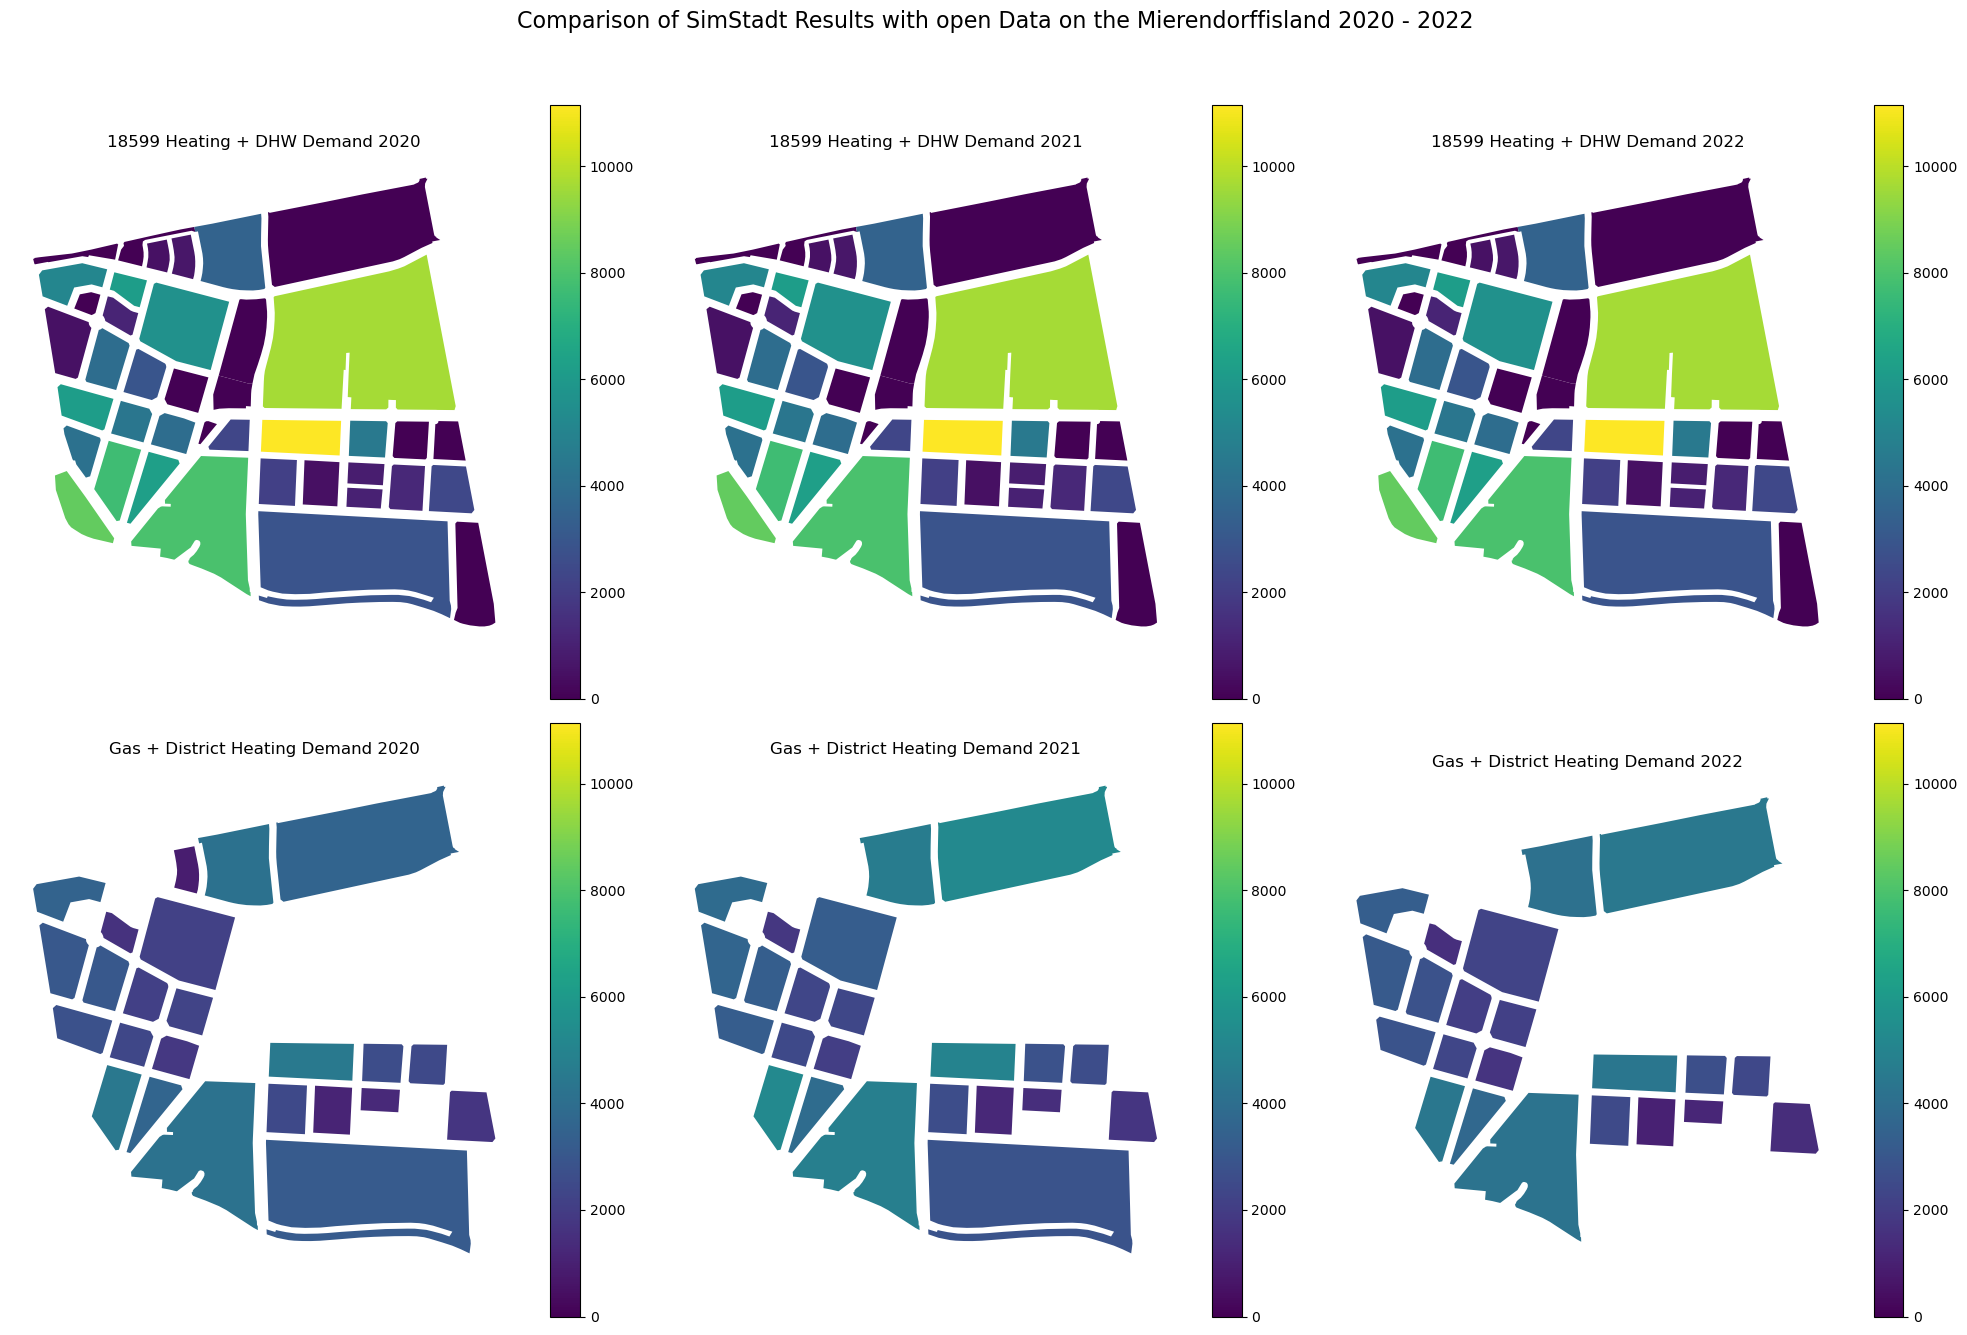

In [52]:
from matplotlib.colors import Normalize


columns_measured = ["Gas + District Heating Demand 2020", "Gas + District Heating Demand 2021", "Gas + District Heating Demand 2022"]
# Assuming simulation_merged_gdf and measured_merged_gdf are defined GeoDataFrames
# Calculate vmin and vmax for normalization across all plots
vmin = min(simulation_merged_gdf[["18599 Heating + DHW Demand 2020", "18599 Heating + DHW Demand 2021", "18599 Heating + DHW Demand 2022"]].min().min(),
           measured_data[columns_measured].min().min())
vmax = max(simulation_merged_gdf[["18599 Heating + DHW Demand 2020", "18599 Heating + DHW Demand 2021", "18599 Heating + DHW Demand 2022"]].max().max(),
           measured_data[columns_measured].max().max())

# Define a normalization for the color mapping
norm = Normalize(vmin=vmin, vmax=vmax)

# Set up the figure for subplots (2 rows, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(20, 14))  # Adjusted to 2 rows


# Create the color map
cmap = plt.cm.viridis


# Plotting QH_sys_MWhyr 2020, 2021, 2022 in the first row
columns = ["18599 Heating + DHW Demand 2020", "18599 Heating + DHW Demand 2021", "18599 Heating + DHW Demand 2022"]
for i, column in enumerate(columns):
    simulation_merged_gdf.plot(column=column, ax=axs[0, i], legend=True, cmap=cmap, norm=norm)
    axs[0, i].set_title(f'{column}')
    axs[0, i].axis('off')

# Plotting gas consumption for 2020, 2021, 2022 in the second row
columns_measured = ["Gas + District Heating Demand 2020", "Gas + District Heating Demand 2021", "Gas + District Heating Demand 2022"]
for i, column in enumerate(columns_measured):
    measured_data.plot(column=column, ax=axs[1, i], legend=True, cmap=cmap, norm=norm)
    axs[1, i].set_title(f'{column}')
    axs[1, i].axis('off')

plt.subplots_adjust(wspace=0.3, hspace=0.5)  # Adjust space between plots

# Add a common title
fig.suptitle('Comparison of SimStadt Results with open Data on the Mierendorffisland 2020 - 2022', fontsize=16)

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to make room for the common title

In [ ]:
# Dobucle check, why some blocks are empty